In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

In [9]:
df= pd.read_csv("/Users/deepbhattacharjee/Documents/All Dataset/Microsoft_Stock.csv",parse_dates=True)
df.head()
X=df['Close'].values

In [27]:
df.shape

(1511, 6)

<AxesSubplot: >

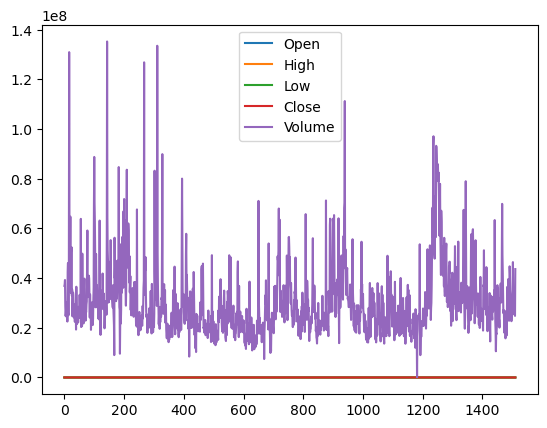

In [12]:
df.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

dftest= adfuller(df['Close'], autolag = 'AIC')
print("1. ADF: ",dftest [0])
print("2. P-Value : ", dftest [1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items () :
    print("It", key, ": ", val)

1. ADF:  1.737136289927098
2. P-Value :  0.9982158366942122
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1486
5. Critical Values :
It 1% :  -3.4347582315402434
It 5% :  -2.863486949792871
It 10% :  -2.567806534528638


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


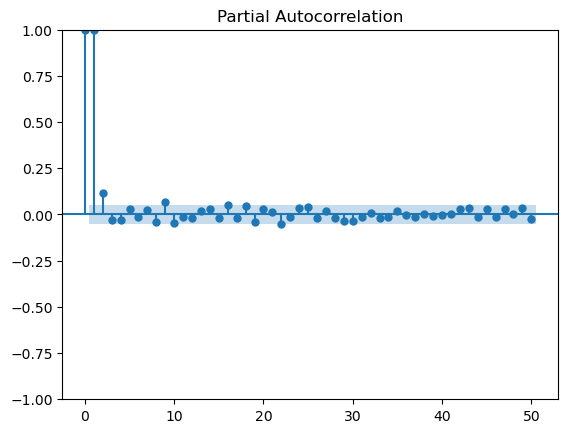

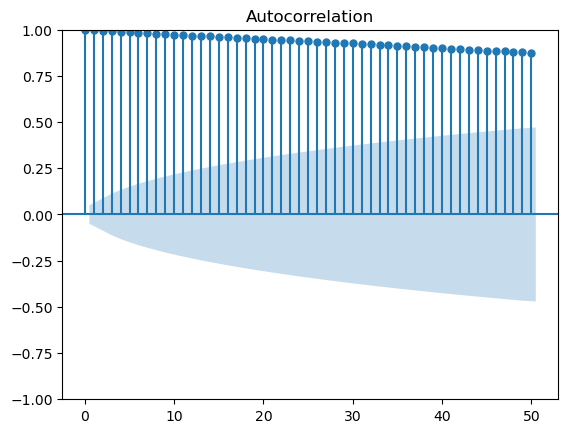

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf (df['Close'],lags=50)
acf=plot_acf(df['Close'],lags=50)

In [42]:
X_train= X[:len(X)-14]
X_test=X[len(X)-14:]

In [112]:
model=AutoReg(X_train,lags=13).fit()

In [113]:
pred=model.predict(start=len(X_train),end=len(X)-1,dynamic=False)

[236.88936764 236.39404528 236.89675156 236.07081017 238.00454953
 236.40365587 238.2644618  237.69054631 238.38877977 238.45704243
 238.27281071 238.98919024 238.66217079 239.54929877]


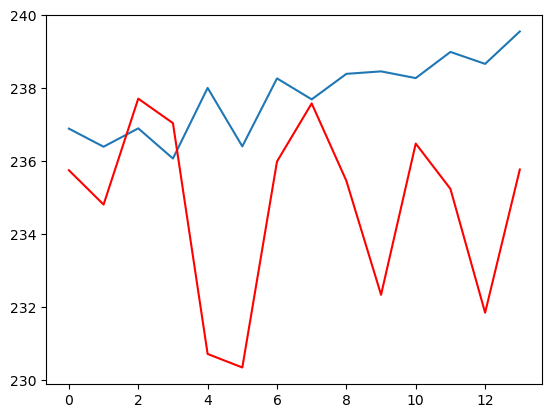

In [114]:

pyplot.plot (pred)
pyplot.plot (X_test, color='red') 
print (pred)

In [120]:
from math import sqrt 
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error (X_test,pred))
print(rmse)

4.002322493681339


In [125]:
pred_future=model.predict (start=len(X)+1, end=len(X) +14,dynamic=False)
print("The future prediction for the next two week")
print (pred_future)
print('Number of Predictions Made: It', len (pred_future))

The future prediction for the next two week
[239.93847845 240.00857063 240.27163658 240.61541764 240.67668988
 241.16950615 241.19834104 241.65976426 241.77005602 242.11015118
 242.34983948 242.56577987 242.89273828 243.06352685]
Number of Predictions Made: It 14


In [61]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1497
Model:                   AutoReg(200)   Log Likelihood               -2749.972
Method:               Conditional MLE   S.D. of innovations              2.016
Date:                Fri, 07 Apr 2023   AIC                           5903.944
Time:                        14:08:11   BIC                           6947.842
Sample:                           200   HQIC                          6295.663
                                 1497                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2058      0.160     -1.282      0.200      -0.520       0.109
y.L1           0.7459      0.028     26.856      0.000       0.691       0.800
y.L2           0.2457      0.035      7.105      0.0